In [2]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=100

In [4]:
x = torch.ones(n,2); x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [5]:
x[:,0]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
x[:,0].uniform_(-1.,1)

tensor([-0.3102, -0.3064,  0.2585,  0.9199,  0.4496, -0.9185, -0.7090,  0.4826,
         0.8378, -0.7584, -0.2283, -0.7207,  0.4734, -0.7177, -0.9925,  0.1808,
        -0.2396, -0.3906,  0.1498, -0.9730, -0.4066, -0.6865, -0.1869,  0.7966,
        -0.8503,  0.2766,  0.7528,  0.6062, -0.7825,  0.8120,  0.7786,  0.0619,
         0.4086, -0.4307,  0.5317,  0.8289,  0.5013, -0.3764,  0.6913, -0.1028,
        -0.1162,  0.9101,  0.1349,  0.4907,  0.4017, -0.9665,  0.7626, -0.5670,
        -0.5067,  0.0652,  0.8558, -0.7055, -0.6523,  0.1487, -0.5960, -0.4120,
        -0.3044,  0.0125, -0.8336, -0.6502, -0.2698,  0.5704,  0.6857,  0.1162,
         0.5642, -0.7782, -0.0210,  0.1482, -0.0044,  0.3991, -0.0107,  0.8409,
         0.8860,  0.8243, -0.8216, -0.9348, -0.4680, -0.9095, -0.0693, -0.6169,
        -0.2736,  0.3516, -0.4699, -0.2884,  0.0573, -0.1845,  0.1681, -0.1520,
        -0.1663, -0.4591, -0.7871,  0.4565, -0.8910, -0.0212,  0.6379,  0.8361,
         0.1838, -0.2563, -0.7468, -0.76

In [7]:
x[:5]

tensor([[-0.3102,  1.0000],
        [-0.3064,  1.0000],
        [ 0.2585,  1.0000],
        [ 0.9199,  1.0000],
        [ 0.4496,  1.0000]])

In [8]:
a = tensor(3.,2); a

tensor([3., 2.])

In [9]:
t = tensor(1.,1); t

tensor([1., 1.])

In [10]:
a@t

tensor(5.)

In [11]:
torch.rand(4)

tensor([0.2855, 0.7248, 0.3964, 0.3652])

In [12]:
y = x@a + torch.rand(n)

In [14]:
y

tensor([ 1.8192,  1.7866,  3.0748,  5.5227,  3.5076,  0.1789,  0.4965,  4.2441,
         4.6567,  0.2450,  1.8145,  0.2733,  3.4262, -0.0929, -0.4462,  2.7577,
         1.9248,  1.5596,  2.8749, -0.2564,  1.7735,  0.7133,  1.9348,  4.9801,
         0.2490,  3.5234,  4.7679,  4.3064,  0.1909,  5.2096,  4.7992,  2.4481,
         4.0980,  0.9386,  4.4445,  4.9870,  4.2278,  1.7419,  4.8981,  1.9568,
         2.3866,  5.2272,  2.4514,  3.9972,  3.4711, -0.4976,  4.7360,  0.8874,
         0.9965,  2.2234,  5.1635,  0.3755,  0.6228,  2.4952,  0.9308,  1.6478,
         1.4042,  2.8111,  0.4531,  0.7165,  1.3107,  3.8392,  4.7975,  3.1747,
         4.3212,  0.0351,  2.7976,  2.5168,  2.3104,  3.4103,  2.3066,  5.1580,
         4.9836,  4.6102, -0.0228, -0.5857,  1.0456, -0.5097,  1.8270,  0.9816,
         1.1939,  3.7572,  1.3711,  1.5372,  3.0371,  1.4877,  3.4530,  2.1449,
         1.6234,  1.2148,  0.1614,  3.4463,  0.1242,  2.4658,  4.2659,  5.4170,
         3.0667,  1.9938, -0.1755,  0.06

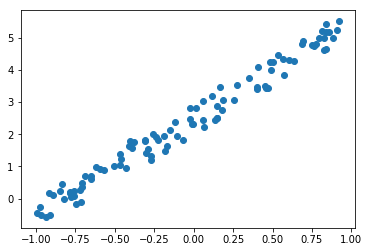

In [15]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [16]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [17]:
a = tensor(-1.,1)

In [18]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9558)

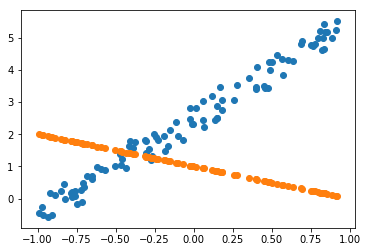

In [19]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [20]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [21]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [22]:
lr = 1e-1
for t in range(100): update()

tensor(6.9558, grad_fn=<MeanBackward1>)
tensor(1.4883, grad_fn=<MeanBackward1>)
tensor(0.4298, grad_fn=<MeanBackward1>)
tensor(0.1641, grad_fn=<MeanBackward1>)
tensor(0.0965, grad_fn=<MeanBackward1>)
tensor(0.0793, grad_fn=<MeanBackward1>)
tensor(0.0749, grad_fn=<MeanBackward1>)
tensor(0.0738, grad_fn=<MeanBackward1>)
tensor(0.0735, grad_fn=<MeanBackward1>)
tensor(0.0735, grad_fn=<MeanBackward1>)


In [36]:
a[:]

tensor([2.9644, 2.5017], grad_fn=<SliceBackward>)

In [51]:
b = tensor(0, 4.)

In [52]:
b[:]

tensor([0., 4.])

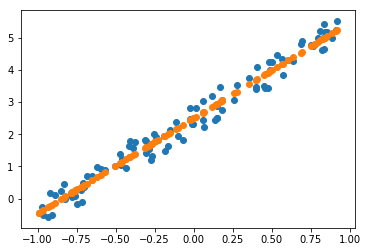

In [27]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [24]:
from matplotlib import animation, rc
rc('animation', html='html5')

You may need to uncomment the following to install the necessary plugin the first time you run this:

In [52]:
# ! sudo add-apt-repository ppa:mc3man/trusty-media  
# ! sudo apt-get update  
# ! sudo apt-get install ffmpeg 
# ! sudo apt-get install frei0r-plugins 

 Upgraded, advanced or not normally available multimedia packages for Trusty
Xenial users go here - https://launchpad.net/~mc3man/+archive/ubuntu/xerus-media

*Please note that if using this ppa I would *not* try upgrading to 14.10/15.04, ect. Do a fresh install instead. The intent here is just for users wishing to stay on 14.04*

If upgrading releases anyway use ppa-purge *First* -
sudo ppa-purge  ppa:mc3man/trusty-media

Also note that using this ppa then disabling may cause issue for installing i386 packages like used by wine. So once enabled leave enabled or purge before removing.

Additionally if using apt-get * sudo  apt-get dist-upgrade will be needed* at times.(pay attention).  Otherwise package managers may be ok.

So typically to enable & first use -
sudo add-apt-repository ppa:mc3man/trusty-media
sudo apt-get update
sudo apt-get dist-upgrade

A few notes:
gstreamer0.10-ffmpeg - needed for some apps that still use gstreamer-0.10 & also provides h.264 in html5 decoding for fir

In [25]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.